# Exercise Set 9: Jacob Cardinal Tremblay, Charchit Kumar Sethi, and Sachin Pradeep Etakkepravan Thulicheri

Due: **9:30 13 June 2022**

Discussion: **13:00 17 June 2022**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_4593683.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

Data analysis and code development is typically done in larger collaborations. The most common way to do this is with a cloud service suce as [GitHub](https://www.github.com). `git` is a common method used for version control. You can find a descriptions of the various capabilities for example at [Atlassian](https://www.atlassian.com/git/tutorials/setting-up-a-repository).

It is recommended that you register on GitHub to get used to it. For the remainder of the course, you may keep your solutions on GitHub and simply send a link to the necessary folder as the ILIAS submission (for example in an ascii file). If you choose to do so, the requirements for a submission remain the same (submit a self-contained pdf) and additional requirements that your repository is called `DataAnalysis` and the exercise solutions are placed in directories `exercise_x/` (so for exercise 9 it would be `exercise_9/`).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression 

# 1. Regression - Fitting a line [data exercise] **[50 Points]**

In this problem we will fit a linear function $f(x) = y_0 + \beta_0 x$ to the data from datafile: `line_data.dat`.

**a)** Perform the linear regression to fit a linear function $f(x) = y_0 + \beta_0 x$ and plot $f(x)$ together with the data points. **25 Points**

In [2]:
#Read in values from file
df = pd.read_table('C:/Users/jacob/Desktop/BCGS/Courses/Semester 2/Data Analysis/Exercise 9/line_datadat.sec', header=None)
df.columns=['x', 'y']

In [3]:
#Perform a linear regression
lr = LinearRegression()
lr.fit(df[['x']],df[['y']])

LinearRegression()

In [4]:
#Calculate the values of the coefficients
B_0 = lr.coef_[0][0]
y_0 = lr.intercept_[0]
print('We calculate a linear regression fit with y_0 = ' + str(B_0))
print('We then calculate the coefficient B_0 = ' + str(B_0))

We calculate a linear regression fit with y_0 = -1.5955454271851284
We then calculate the coefficient B_0 = -1.5955454271851284


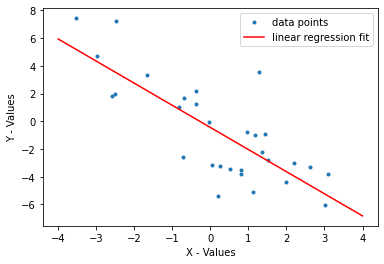

In [5]:
#Plot the data and linear regression
x = np.linspace(-4,4, 20)
fx = y_0 + B_0*x
plt.plot(df.x,df.y,'.', label='data points')
plt.plot(x, fx, 'r-', label='linear regression fit')
plt.xlabel('X - Values')
plt.ylabel('Y - Values')
plt.legend()
plt.show()

**b)** Compute the residuals and plot them. What is $R^2$? **25 Points**

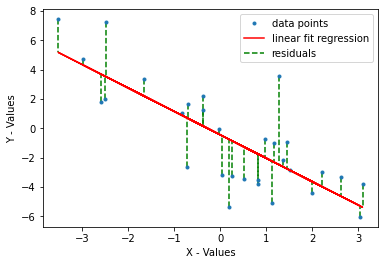

In [6]:
#Calculate the residuals
x = df.x
y = df.y
fx = y_0 + B_0*x
resid = df.y-fx

#Plot the residuals
plt.plot(df.x,df.y,'.')
plt.plot(x, fx, 'r-')
plt.xlabel('X - Values')
plt.ylabel('Y - Values')
for i in range(0,len(x)):
    plt.vlines(x[i], y[i], y[i]-resid[i], linestyle='--', color='green')
plt.legend(['data points', 'linear fit regression', 'residuals'])
plt.show()

In [7]:
#Calculate the R Squared value
ssres = np.sum(resid**2)
meany = np.mean(df.y)
sstot = np.sum((df.y-meany)**2)

R_squared = 1 - (ssres/sstot)
print(f'R Squared is: {R_squared}')

R Squared is: 0.6124158502151285


# 2. Model fit quality assessment **[50 Points]**

In this problem you will assess the quality of a fit by inspecting the residuals of the fit. For each of the
following plots state whether the residuals indicate a reasonable model fit and briefly explain your
conclusion and if applicable how possibly to improve the fit. **50 Points**

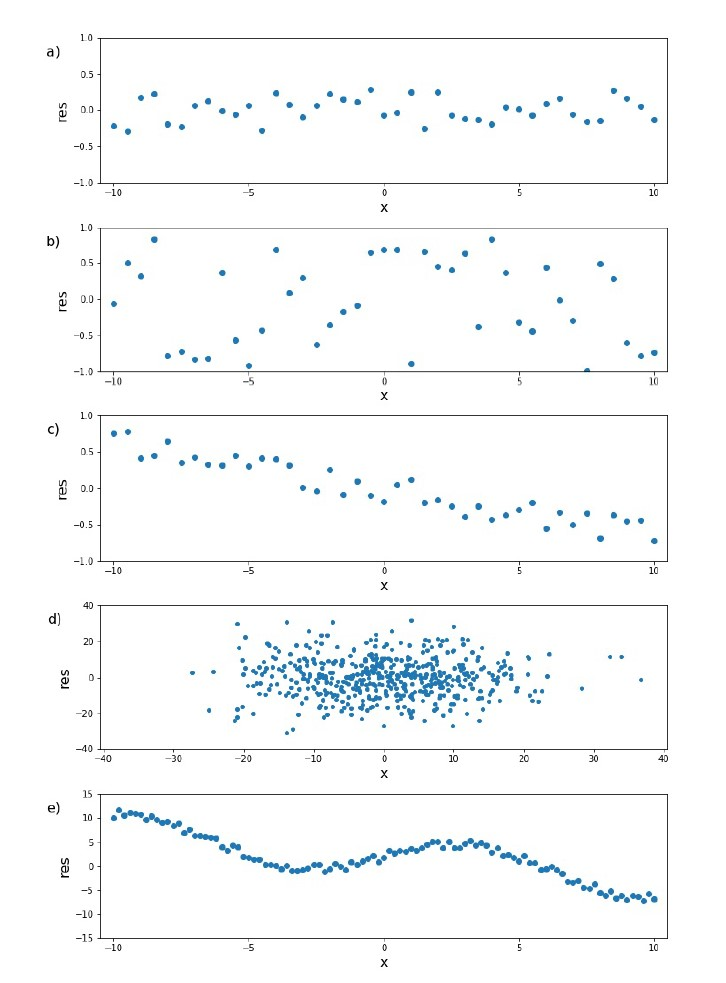

a) Here we see that the residuals are not extremely close, however they lie between a pretty clear line between -0.5 and 0.5 and therefore the fit could be considered good, depending on what type of data this represents. The residuals are relatively small therefore they should indicate a reasonable model fit. The way to for this residuals to be improved woud be if they are all closer to 0.0.

b) Here the residuals are much larger than in a. There is not much of a fit when we are zoomed between -1.0 and 1.0, therefore if we need really precise data, this would not be a good fit. It could still however be a good fit if we are dealing with less precise data, in which case a residual difference of +-1 would not be very large and could still indicate a good fit. Ideally we would want these residuals to be closer to a straight line around 0 (or some other fit shape between -1.0 and 1.0), but to determine the real shape of the fit, smaller residuals would be needed.

c) Here the residuals appear to show a much nicer fit. There appears to be a negative linear fit between 1.0 and -1.0 and the residuals are all fairly close to a line. The residuals could still be even smaller if we were looking for an extremely precise fit.

d) Here the residuals seem to be quite scattered, there is no clear fit and very large residuals (-40 to 40). This means that there is likely no good fit here.

e) Here we see that the residuals are somewhat close together and show a clear fit as a descreasing sinusoidial. Our range here is somewhat larger than the first 3 graphs (-15 to 15) however we still see a clear shape, and therefore we can conclude that there is a good fit to the residuals.